In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
# import some data to play with
df = pd.read_csv('/content/Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df=pd.get_dummies(df,columns=['Marital.Status'])

In [6]:
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,68833,50047,10,YES,0,0,1
1,YES,33700,134075,18,YES,1,0,0
2,NO,36925,160205,30,YES,0,1,0
3,YES,50190,193264,15,YES,0,0,1
4,NO,81002,27533,28,NO,0,1,0


In [8]:
# Classifying taxable income into categorical data type
Fraud_Check = []
for value in df["Taxable.Income"]:
    if value <= 30000:
        Fraud_Check.append("Risky")
    else:
        Fraud_Check.append("Good")
       
df["Fraud_Check"] = Fraud_Check   
print(df)

    Undergrad  Taxable.Income  ...  Marital.Status_Single  Fraud_Check
0          NO           68833  ...                      1         Good
1         YES           33700  ...                      0         Good
2          NO           36925  ...                      0         Good
3         YES           50190  ...                      1         Good
4          NO           81002  ...                      0         Good
..        ...             ...  ...                    ...          ...
595       YES           76340  ...                      0         Good
596       YES           69967  ...                      0         Good
597        NO           47334  ...                      0         Good
598       YES           98592  ...                      0         Good
599        NO           96519  ...                      0         Good

[600 rows x 9 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Undergrad                600 non-null    object
 1   Taxable.Income           600 non-null    int64 
 2   City.Population          600 non-null    int64 
 3   Work.Experience          600 non-null    int64 
 4   Urban                    600 non-null    object
 5   Marital.Status_Divorced  600 non-null    uint8 
 6   Marital.Status_Married   600 non-null    uint8 
 7   Marital.Status_Single    600 non-null    uint8 
 8   Fraud_Check              600 non-null    object
dtypes: int64(3), object(3), uint8(3)
memory usage: 30.0+ KB


In [10]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Fraud_Check']= label_encoder.fit_transform(df['Fraud_Check']) 
df['Undergrad']= label_encoder.fit_transform(df['Undergrad']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Fraud_Check
0,0,68833,50047,10,1,0,0,1,0
1,1,33700,134075,18,1,1,0,0,0
2,0,36925,160205,30,1,0,1,0,0
3,1,50190,193264,15,1,0,0,1,0
4,0,81002,27533,28,0,0,1,0,0


In [11]:
x=df.iloc[:,0:7]
y=df['Fraud_Check']

In [12]:
print(x.head())
print(y.head())

   Undergrad  Taxable.Income  ...  Marital.Status_Divorced  Marital.Status_Married
0          0           68833  ...                        0                       0
1          1           33700  ...                        1                       0
2          0           36925  ...                        0                       1
3          1           50190  ...                        0                       0
4          0           81002  ...                        0                       1

[5 rows x 7 columns]
0    0
1    0
2    0
3    0
4    0
Name: Fraud_Check, dtype: int64


In [13]:
df.Fraud_Check.value_counts()

0    476
1    124
Name: Fraud_Check, dtype: int64

In [14]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Fraud_Check']

In [15]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [16]:
# Building decision tree using Gini method

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=8)

In [18]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

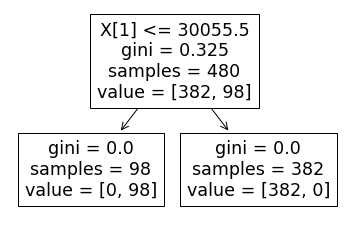

In [19]:
#Ploting the decision tree
tree.plot_tree(model_gini);

In [20]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

1.0